In [87]:
%pip install prettytable
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [89]:
data = pd.read_csv("../dataScience/dsprep/modified_employee_data.csv", encoding = "ISO-8859-1", engine="python")

## EDA

In [90]:
data.head()

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted
0,65438,Sales & Marketing,1,8,49.0,0
1,65141,Operations,1,4,60.0,0
2,7513,Sales & Marketing,1,7,50.0,0
3,2542,Sales & Marketing,2,10,50.0,0
4,48945,Technology,1,2,73.0,0


In [91]:
data.tail()

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted
54803,3030,Technology,1,17,78.0,0
54804,74592,Operations,1,6,56.0,0
54805,13918,Analytics,1,3,79.0,0
54806,13614,Sales & Marketing,1,2,NaN,0
54807,51526,HR,1,5,49.0,0


In [92]:
data.columns

Index(['employee_id', 'designation', 'no_of_trainings', 'length_of_service',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [93]:
data.shape

(54808, 6)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   designation         54808 non-null  object 
 2   no_of_trainings     54808 non-null  int64  
 3   length_of_service   54808 non-null  int64  
 4   avg_training_score  52248 non-null  float64
 5   is_promoted         54808 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ MB


In [95]:
data.dtypes


employee_id             int64
designation            object
no_of_trainings         int64
length_of_service       int64
avg_training_score    float64
is_promoted             int64
dtype: object

In [96]:
np.sum(data.isnull().any(axis=1))

2560

In [97]:
data.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
dtype: int64

In [98]:
data.describe()

,employee_id,no_of_trainings,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,5.865512,63.712238,0.085170
std,22586.581449,0.609264,4.265094,13.521910,0.279137
min,1.000000,1.000000,1.000000,39.000000,0.000000
25%,19669.750000,1.000000,3.000000,51.000000,0.000000
50%,39225.500000,1.000000,5.000000,60.000000,0.000000
75%,58730.500000,1.000000,7.000000,77.000000,0.000000
max,78298.000000,10.000000,37.000000,99.000000,1.000000


## Data Analysis

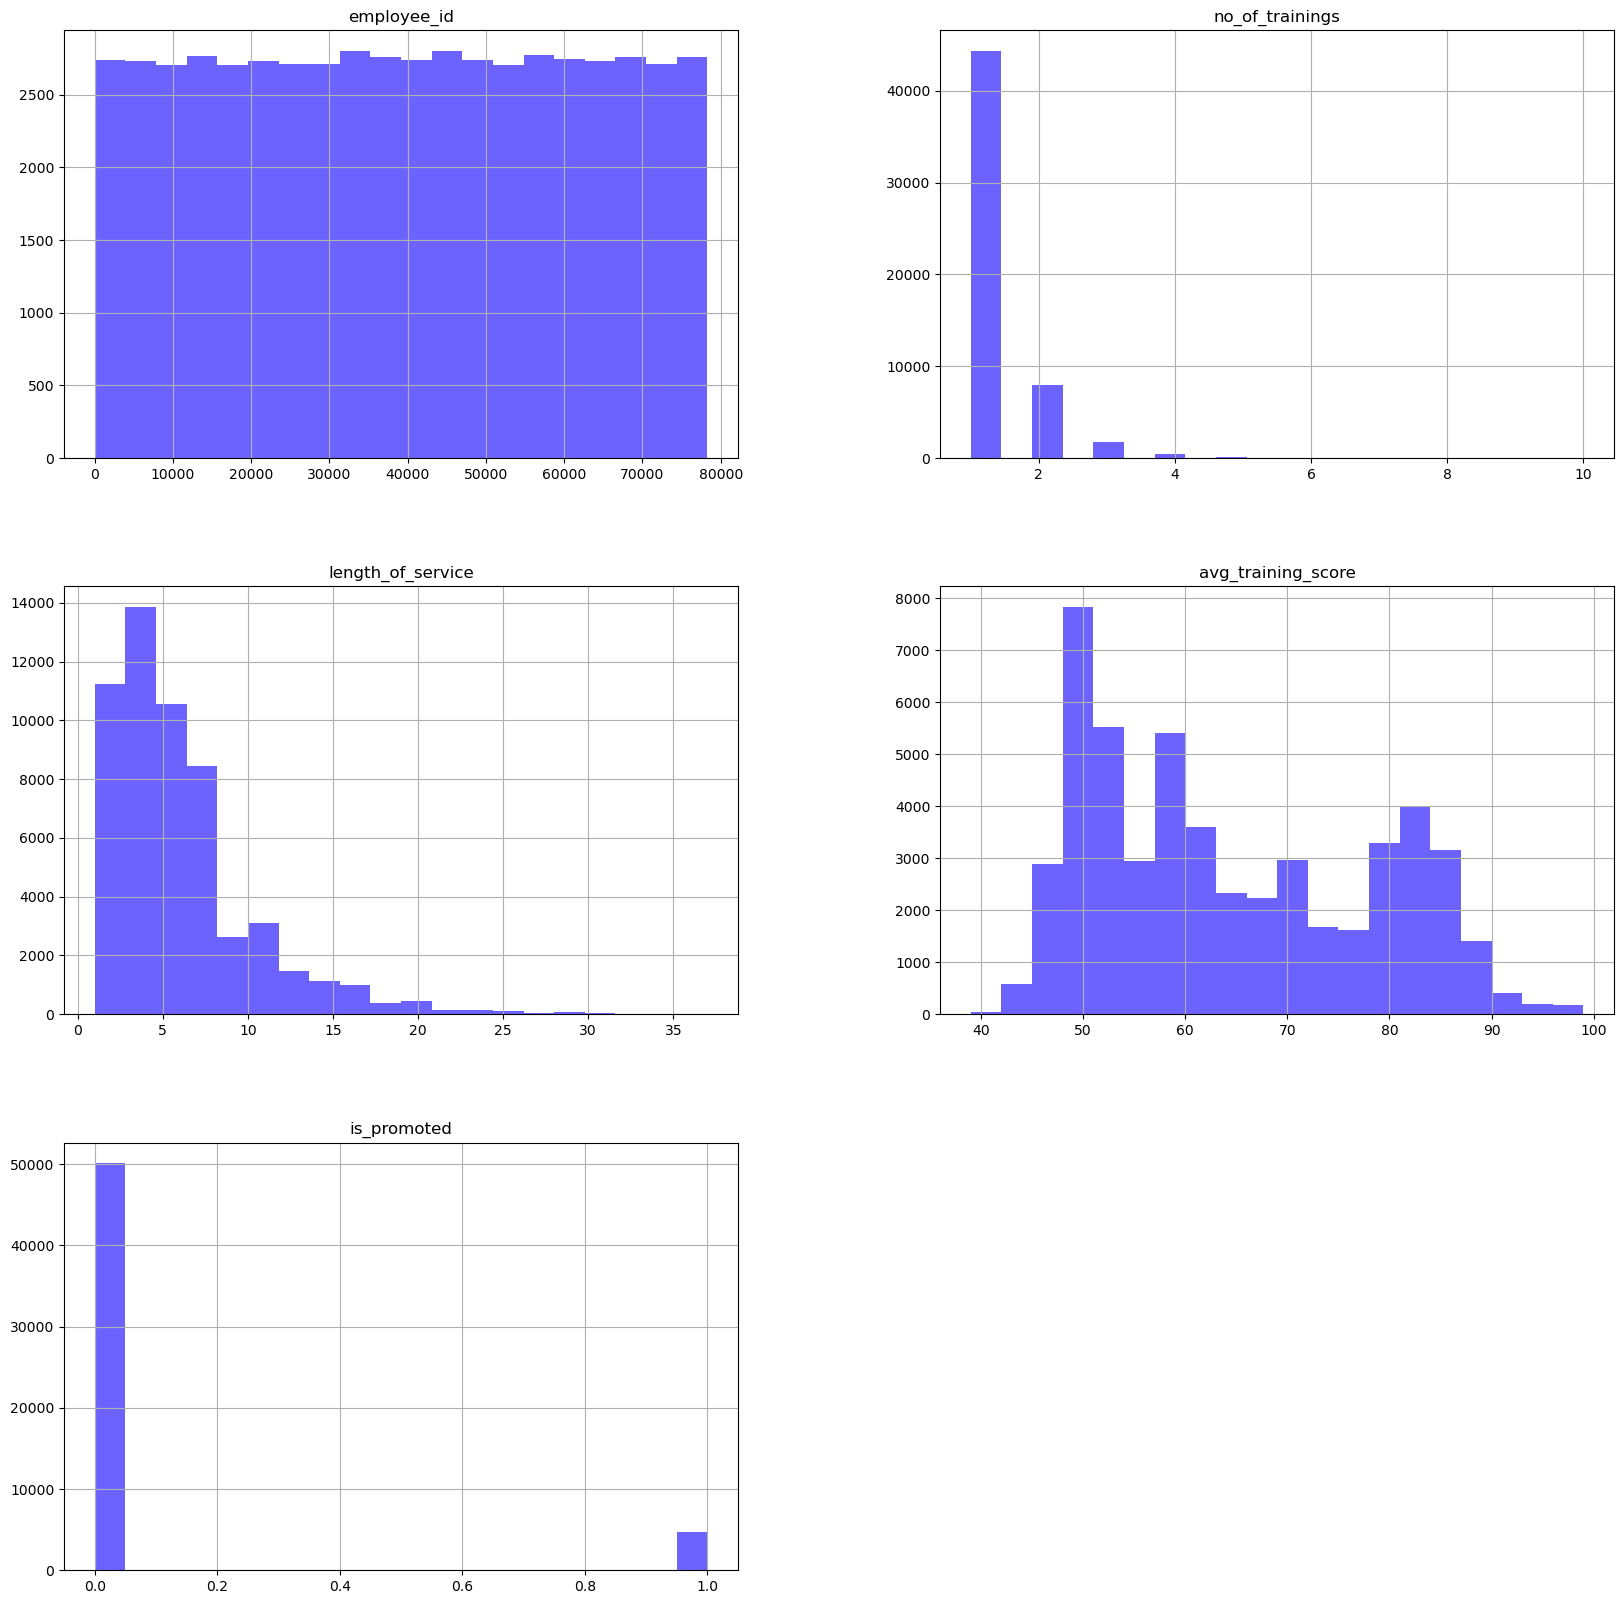

In [99]:
#Numeric features distrubution
data.hist(figsize=(20,20),bins = 20, color="#6C63FF")
plt.title("Numeric Features Distribution")
plt.show()


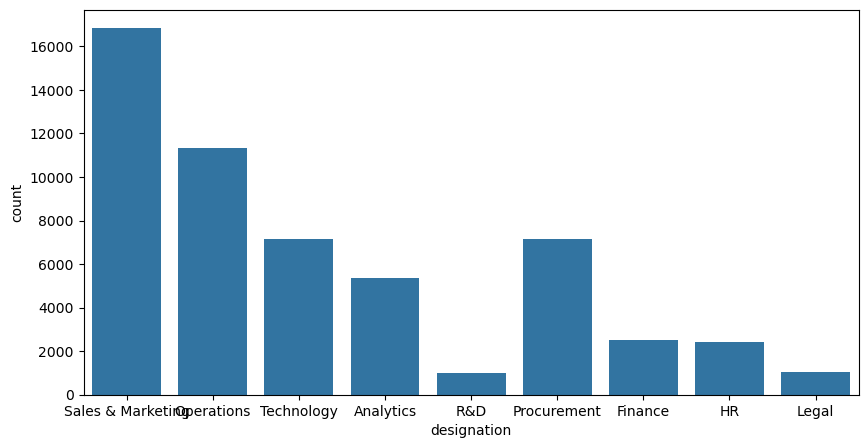

In [100]:
#designation distribution
sns.countplot(data= data, x = "designation")
plt.show()

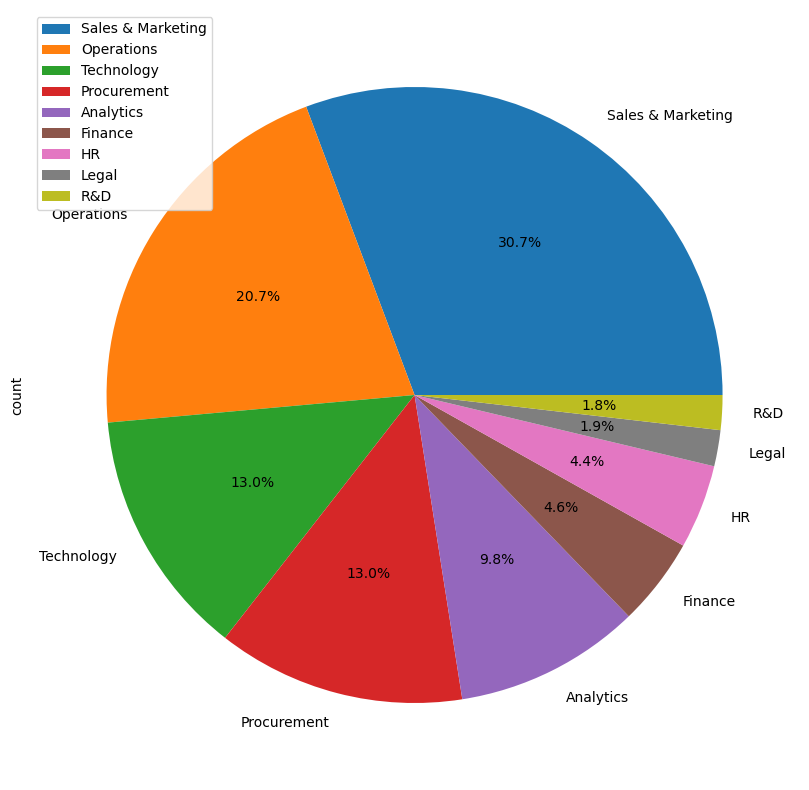

In [101]:
data["designation"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

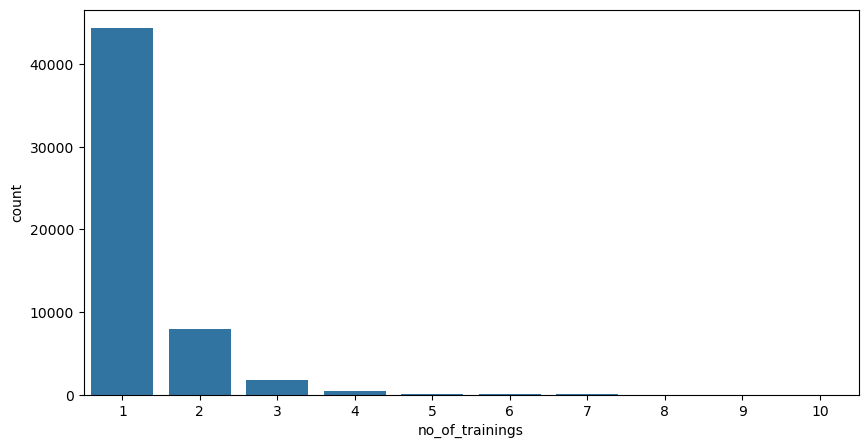

In [102]:
#no_of_trainings distribution
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

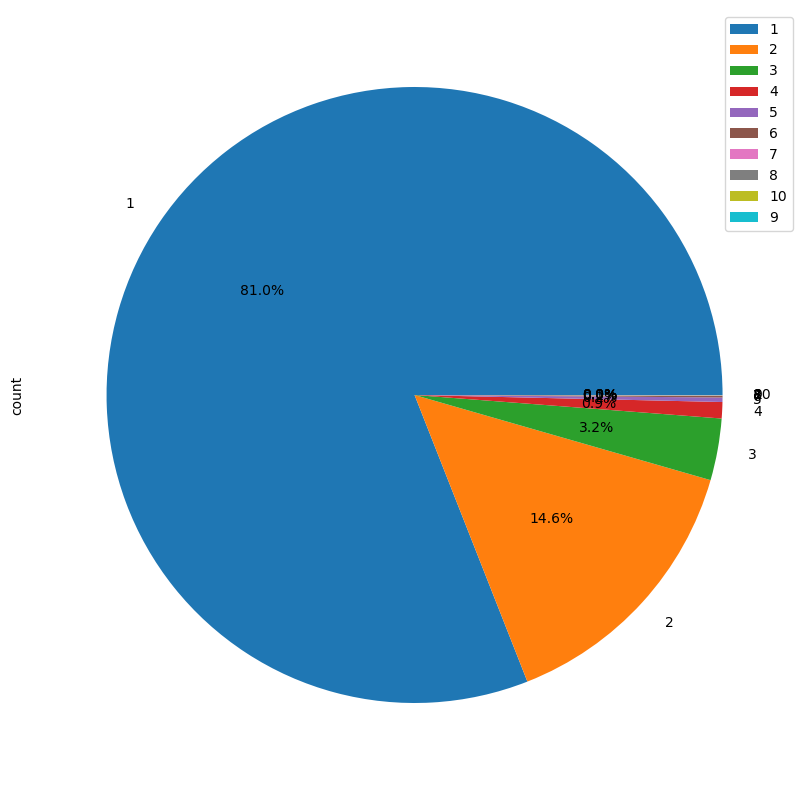

In [103]:
data["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

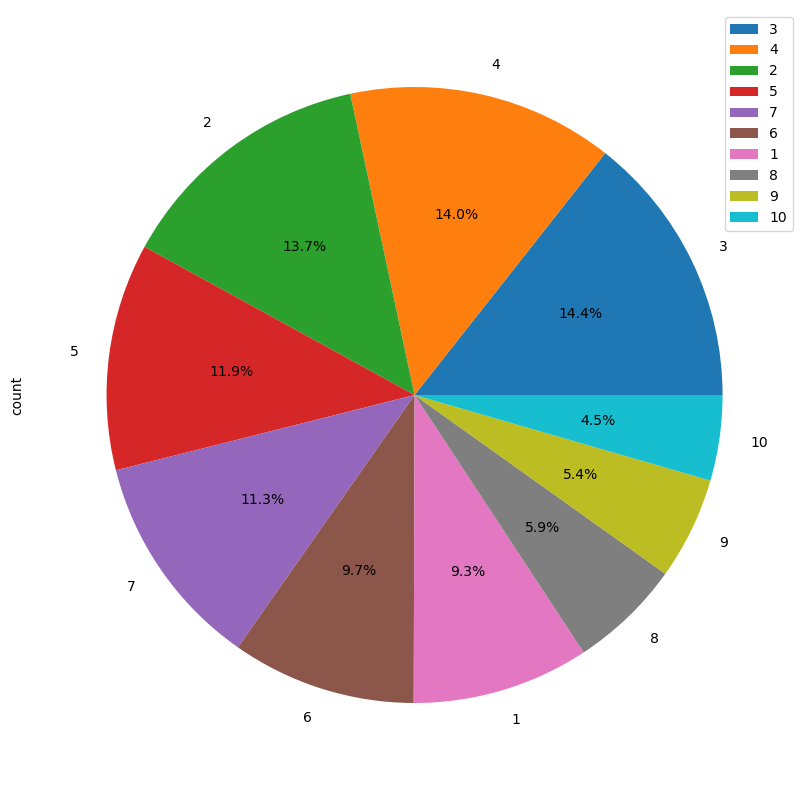

In [104]:
data["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

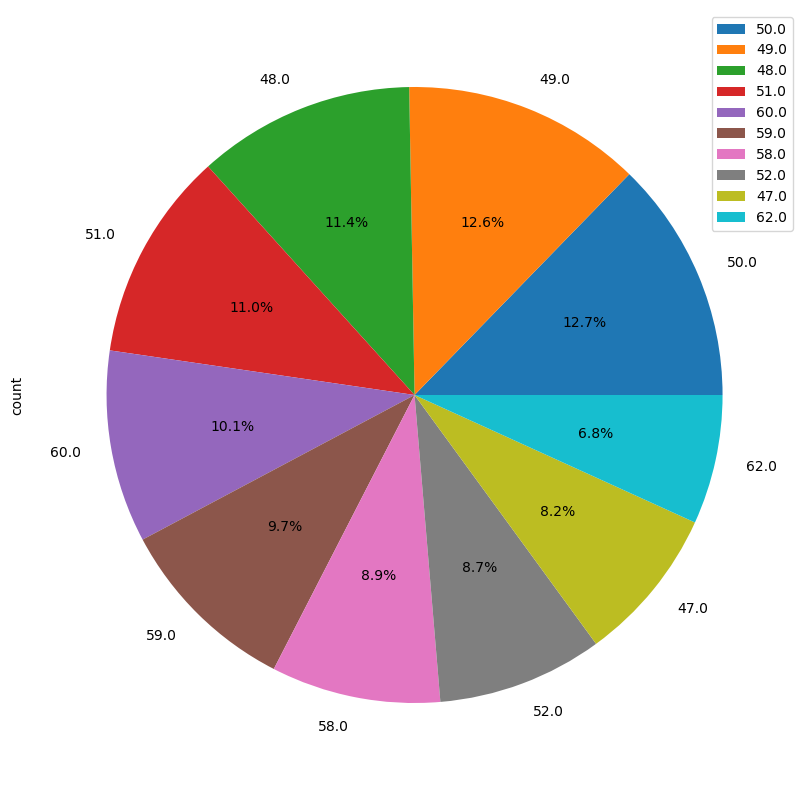

In [105]:
#avg_training_score distribution
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

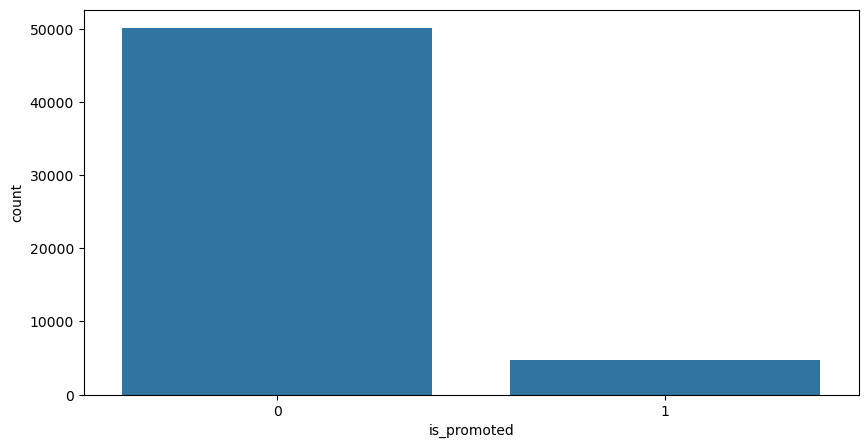

In [107]:
#is_promoted distribution
sns.countplot(data= data, x = "is_promoted")
plt.show()

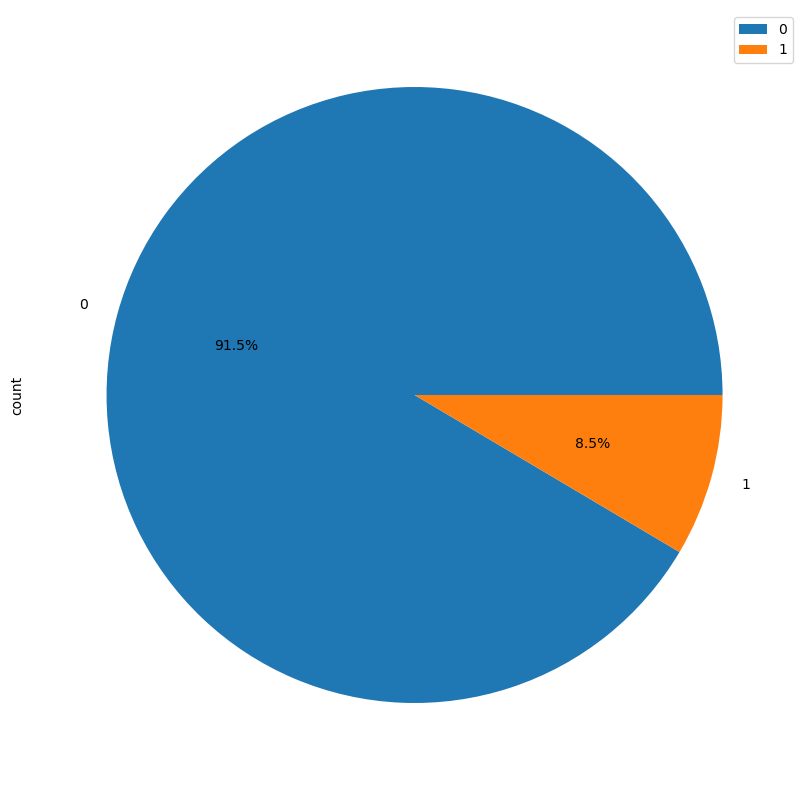

In [108]:
data["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [109]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

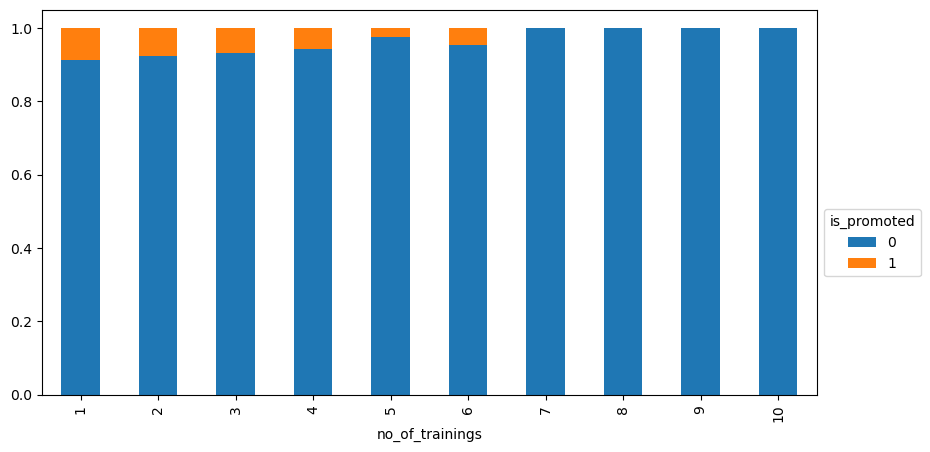

In [110]:
#Distribution of promoted employees ratio across different no_of_trainings
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

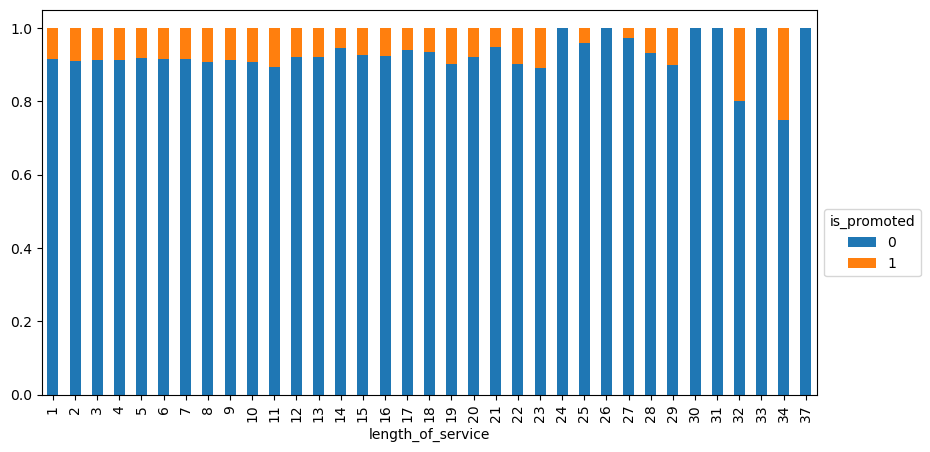

In [111]:
#Distribution of promoted employees ratio across different length_of_service
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.length_of_service,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

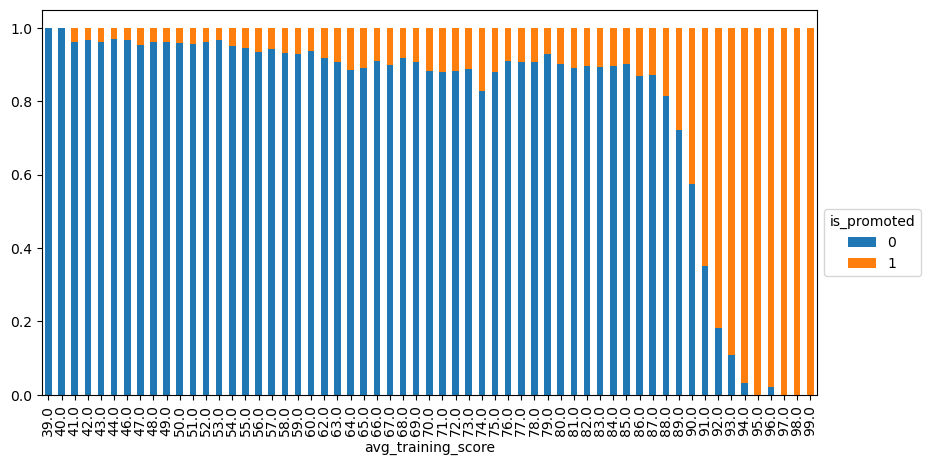

In [112]:
#Distribution of promoted employees ratio across different avg_training_score
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.avg_training_score,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [114]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['designation'])
data['designation'] = encpro

<Axes: title={'center': 'Pearson Correlation of Features'}>

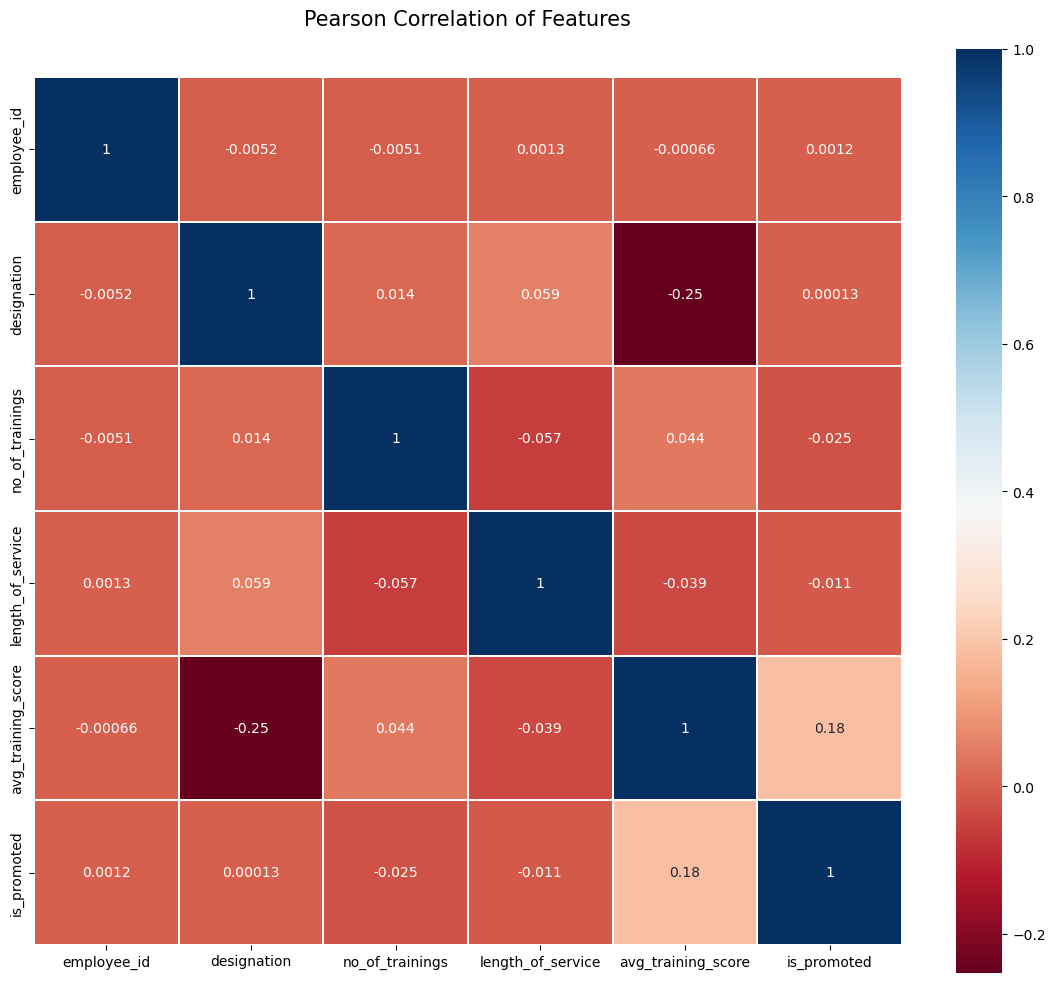

In [115]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

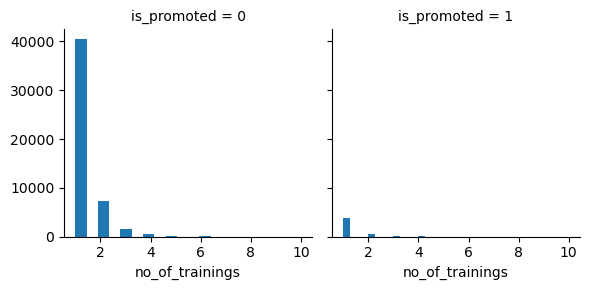

In [116]:
#no_of_trainings plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

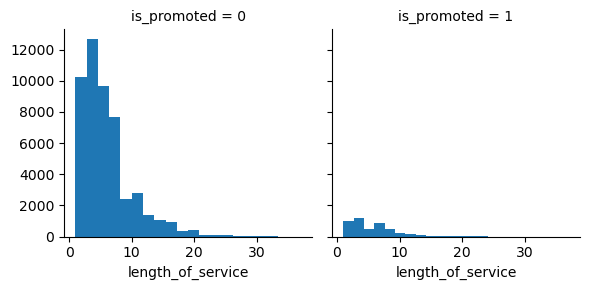

In [117]:
#length_of_service plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

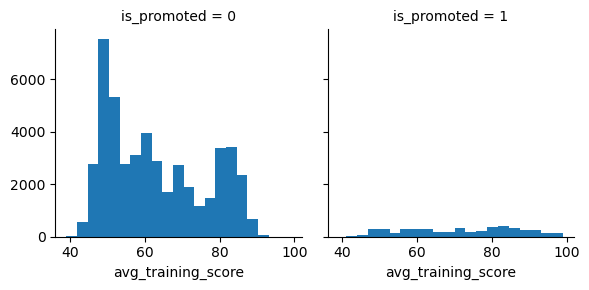

In [118]:
#avg_training_score plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

## Data Pre-Processing

In [120]:
data=data.drop_duplicates()

In [121]:
data.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
dtype: int64

In [122]:
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [123]:
data.isnull().sum()

employee_id           0
designation           0
no_of_trainings       0
length_of_service     0
avg_training_score    0
is_promoted           0
dtype: int64

## Model Building

In [124]:
X=data.drop(columns=['is_promoted', 'employee_id'])
y=data['is_promoted']

In [125]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

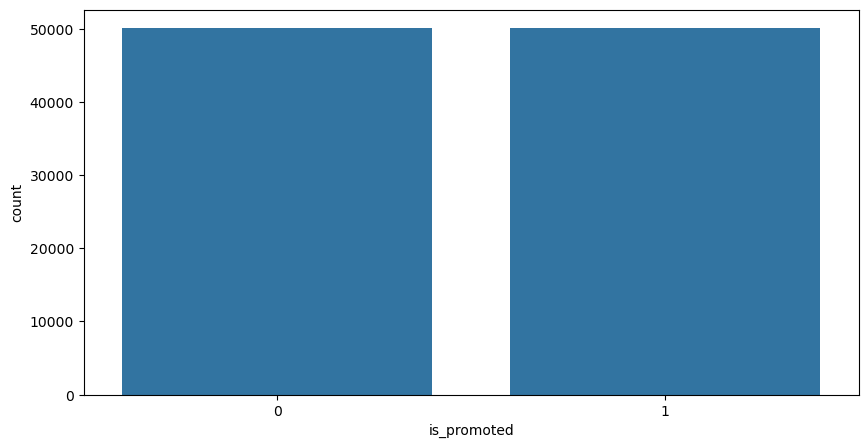

In [126]:
sns.countplot(data= data, x = y_up)

In [127]:
X = pd.get_dummies(X)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

In [129]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(verbosity=0),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.76
Precision: 0.79
Recall: 0.72
F1 Score: 0.75
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     15105
           1       0.79      0.72      0.75     14979

    accuracy                           0.76     30084
   macro avg       0.76      0.76      0.76     30084
weighted avg       0.76      0.76      0.76     30084


Model: Decision Tree
Accuracy: 0.76
Precision: 0.79
Recall: 0.72
F1 Score: 0.75
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     15105
           1       0.79      0.72      0.75     14979

    accuracy                           0.76     30084
   macro avg       0.77      0.76      0.76     30084
weighted avg       0.77      0.76      0.76     30084


Model: XGBoost
Accuracy: 0.72
Precision: 0.80
Recall: 0.60
F1 Score: 0.68
              precision    recall  f1-score   support

           0       0.68      0.85      0.75     15105


In [132]:
# Get coefficients for Logistic Regression
log_reg = models['Logistic Regression']
coefficients = log_reg.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 5 Coefficients for Logistic Regression:")
print(coef_df.head(5))


Top 5 Coefficients for Logistic Regression:
              Feature  Coefficient
3  avg_training_score     0.669811
1     no_of_trainings    -0.382477
0         designation     0.103819
2   length_of_service    -0.089097


In [133]:
def predict_promotion(model, employee_data):
    employee_df = pd.DataFrame([employee_data])
    employee_encoded = pd.get_dummies(employee_df)
    
    # Add missing columns that exist in the training data
    for col in X.columns:
        if col not in employee_encoded.columns:
            employee_encoded[col] = 0
    
    # Align the columns to match the training data
    employee_encoded = employee_encoded[X.columns]
    
    # Standardize the numeric features
    employee_encoded = scaler.transform(employee_encoded)
    
    # Predict promotion
    prediction = model.predict(employee_encoded)
    return "Promoted" if prediction[0] == 1 else "Not Promoted"

In [140]:
# Example new employee data
new_employee = {
    'designation': 'Sales & Marketing',
    'no_of_trainings': 8,
    'length_of_service': 3,
    'avg_training_score': 90.0,
}

# Making predictions with all models
for name, model in models.items():
    print(f"\nPrediction for new employee using {name}: {predict_promotion(model, new_employee)}")


Prediction for new employee using Random Forest: Not Promoted

Prediction for new employee using Decision Tree: Promoted

Prediction for new employee using XGBoost: Not Promoted

Prediction for new employee using Logistic Regression: Not Promoted


downsampled

In [141]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [142]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted
11,49017,7,1,3,50.0,1
39,58304,7,1,6,51.0,1
60,17673,7,1,17,47.0,1
66,77981,1,1,1,58.0,1
67,16502,7,1,1,50.0,1
...,...,...,...,...,...,...
6140,23528,4,1,5,50.0,0
27187,41911,6,1,5,85.0,0
12797,29967,7,1,19,50.0,0
26036,2041,1,1,5,60.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

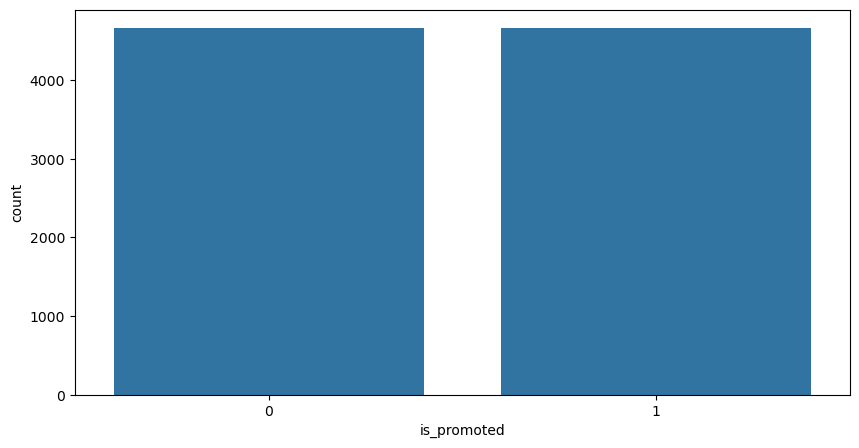

In [143]:
sns.countplot(data= data, x = downsample['is_promoted'])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

In [145]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

In [146]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test)))
y_pred = LR.predict(X_test)
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3))
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4))
print('F1',round(f1_score(y_test, y_pred, average='micro'),2))

Test set
  Accuracy: 0.63
Precision 0.632
Recall 0.6323
F1 0.63


In [147]:
DT=DecisionTreeClassifier()
DT= DT.fit(X_train , y_train)
DT

DecisionTreeClassifier()

In [148]:
dt=DT.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(DT.score(X_test, y_test)))

Test set
  Accuracy: 0.61


In [149]:
XG=XGBClassifier(verbosity = 0)
XG= XG.fit(X_train , y_train)
XG

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [150]:
xg=XG.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(XG.score(X_test, y_test)))

Test set
  Accuracy: 0.64
